In [1]:
from samana.Data.psj1606 import PSJ1606_HST
from samana.Model.psj1606_model import PSJ1606ModelEPLM3M4Shear
import numpy as np
import matplotlib.pyplot as plt
from lenstronomy.Workflow.fitting_sequence import FittingSequence

In [3]:
data = PSJ1606_HST()
model = PSJ1606ModelEPLM3M4Shear(data, shapelets_order=8)
kwargs_lens_macro_init = None
kwargs_model, _, _, _, _ = model.setup_kwargs_model(kwargs_lens_macro_init=kwargs_lens_macro_init)
kwargs_params = model.kwargs_params(kwargs_lens_macro_init=kwargs_lens_macro_init)
kwargs_likelihood = model.kwargs_likelihood 

fitting_sequence = FittingSequence(data.kwargs_data_joint, kwargs_model, model.kwargs_constraints, 
                                  model.kwargs_likelihood, kwargs_params)

nthreads = 10
fitting_kwargs_list = [
        ['update_settings', {'lens_add_fixed': [[0, ['a4_a', 'a3_a','a1_a'], [0.0, 0.0,0.0]]]}],
        ['PSO', {'sigma_scale': 1., 'n_particles': 10, 'n_iterations': 100, 'threadCount': nthreads}],
        #['psf_iteration', {'psf_symmetry': 4}],
        #['PSO', {'sigma_scale': 1., 'n_particles': 50, 'n_iterations': 50, 'threadCount': nthreads}],
        #['update_settings', {'lens_remove_fixed': [[0, ['a4_a', 'a3_a']]]}],
        #['PSO', {'sigma_scale': 1., 'n_particles': 50, 'n_iterations': 50, 'threadCount': nthreads}],
        #['MCMC', {'n_burn': 150, 'n_run': 100, 'walkerRatio': 4, 'sigma_scale': 0.1, 'threadCount': nthreads}]
                          ]
chain_list = fitting_sequence.fit_sequence(fitting_kwargs_list)
kwargs_result = fitting_sequence.best_fit()

Computing the PSO ...


 50%|███████████████████████████████████████████████████████████████████████████▌                                                                           | 50/100 [00:16<00:15,  3.31it/s]/Users/danielgilman/Code/external/lenstronomy/lenstronomy/LensModel/Profiles/epl.py:300: RuntimeWarning: invalid value encountered in power
  alpha = 2 / (1 + q) * (b / R) ** t * R_omega
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/LensModel/Profiles/multipole.py:550: RuntimeWarning: invalid value encountered in log
  + lambda_m3 / 2 * (np.log(r / r_E) + np.cos(phi) ** 2)
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/LensModel/Profiles/multipole.py:491: RuntimeWarning: invalid value encountered in log
  + lambda_m1 / 2 * (np.log(r / r_E) + np.cos(phi) ** 2)
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/LensModel/Profiles/epl.py:297: RuntimeWarning: invalid value encountered in divide
  R_omega = Z * hyp2f1(1, t / 2, 2 - t / 2, -(1 - q) / (1 + q) * (Z / Z.conj()))


Max iteration reached! Stopping.
-1.3173148400568078 reduced X^2 of best position
-3676.6257185985505 log likelihood
5582 effective number of data points
[{'theta_E': 0.6586250306207602, 'gamma': 1.8892817505379103, 'e1': -0.08502209432662922, 'e2': -0.02550361699476926, 'center_x': 0.028394266199653535, 'center_y': -0.06504419995889822, 'a1_a': 0.0, 'delta_phi_m1': 0.037566821536395484, 'a3_a': 0.0, 'delta_phi_m3': 0.4677447942621006, 'a4_a': 0.0, 'delta_phi_m4': -0.1283996963694785}, {'gamma1': 0.06232759662294584, 'gamma2': 0.11891085643266908, 'ra_0': 0.0, 'dec_0': 0.0}, {'theta_E': 0.11910812741581576, 'center_x': -0.27998188021345705, 'center_y': -1.2434454864747635}] lens result
[{'amp': 1, 'R_sersic': 0.32022062731925766, 'n_sersic': 3.7833261519331725, 'e1': -0.41622324321161414, 'e2': 0.3287856646210013, 'center_x': 0.04364067160583729, 'center_y': -0.14953911108998702}, {'amp': 1, 'n_max': 8, 'beta': 0.15749733097626928, 'center_x': 0.04364067160583729, 'center_y': -0.149539


/Users/danielgilman/Code/external/lenstronomy/lenstronomy/LensModel/MultiPlane/multi_plane.py:77: UserWarning: Cosmology is provided. Make sure your cosmological model is consistent with the cosmology_model argument.
  warnings.warn(


-1.295445934875762 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.295445934875779
(30, ['gamma_lens0', 'delta_phi_m1_lens0', 'delta_phi_m3_lens0', 'delta_phi_m4_lens0', 'gamma1_lens1', 'gamma2_lens1', 'theta_E_lens2', 'R_sersic_source_light0', 'n_sersic_source_light0', 'e1_source_light0', 'e2_source_light0', 'beta_source_light1', 'R_sersic_lens_light0', 'n_sersic_lens_light0', 'e1_lens_light0', 'e2_lens_light0', 'center_x_lens_light0', 'center_y_lens_light0', 'R_sersic_lens_light1', 'n_sersic_lens_light1', 'center_x_lens_light1', 'center_y_lens_light1', 'delta_x_image', 'delta_x_image', 'delta_x_image', 'delta_x_image', 'delta_y_image', 'delta_y_image', 'delta_y_image', 'delta_y_image'])


/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:68: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:161: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:225: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:1121: RuntimeWarning: invalid value encountered in log10
  np.log10(model),


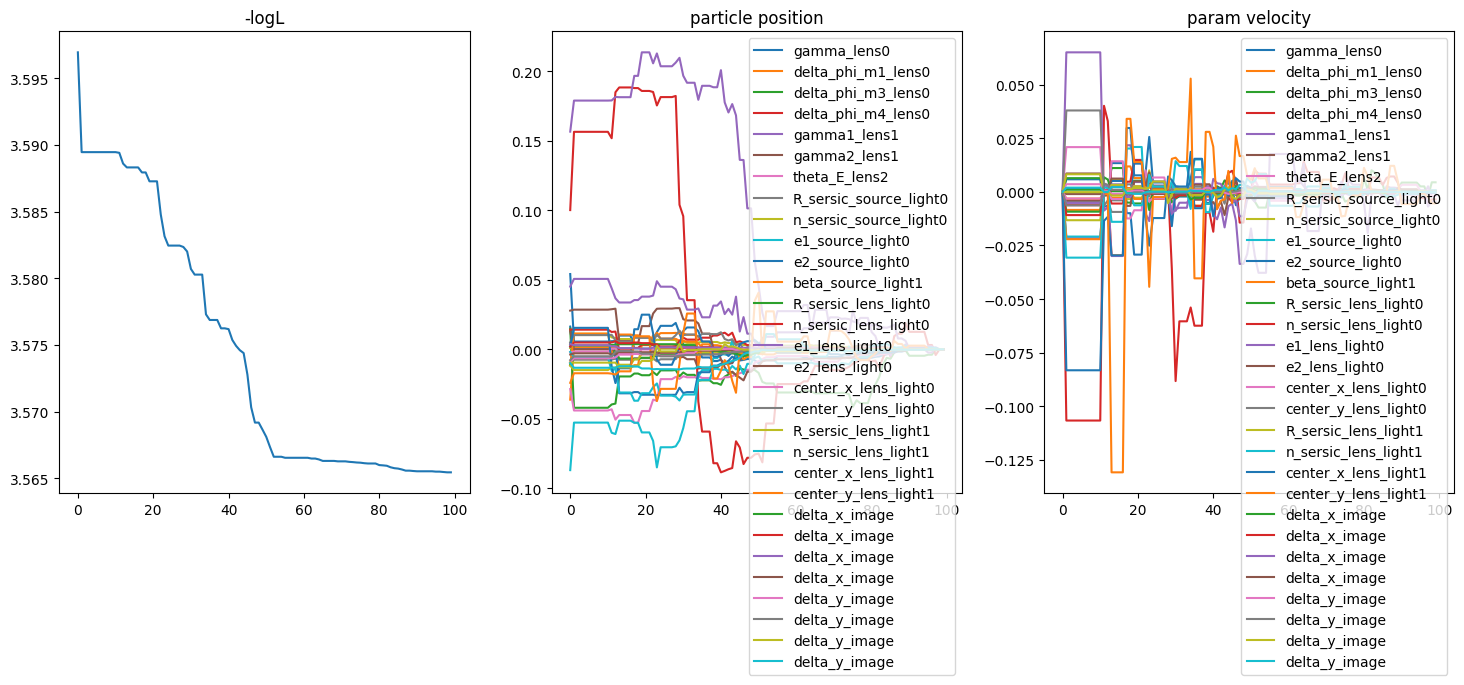

<Figure size 640x480 with 0 Axes>

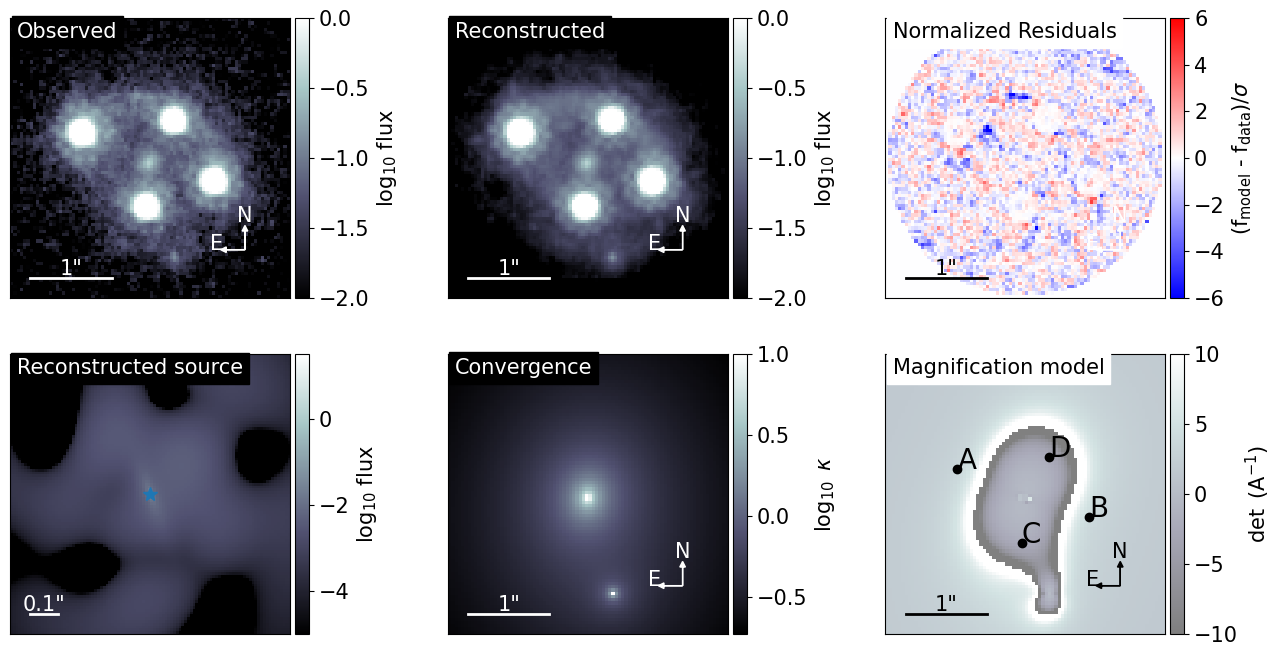

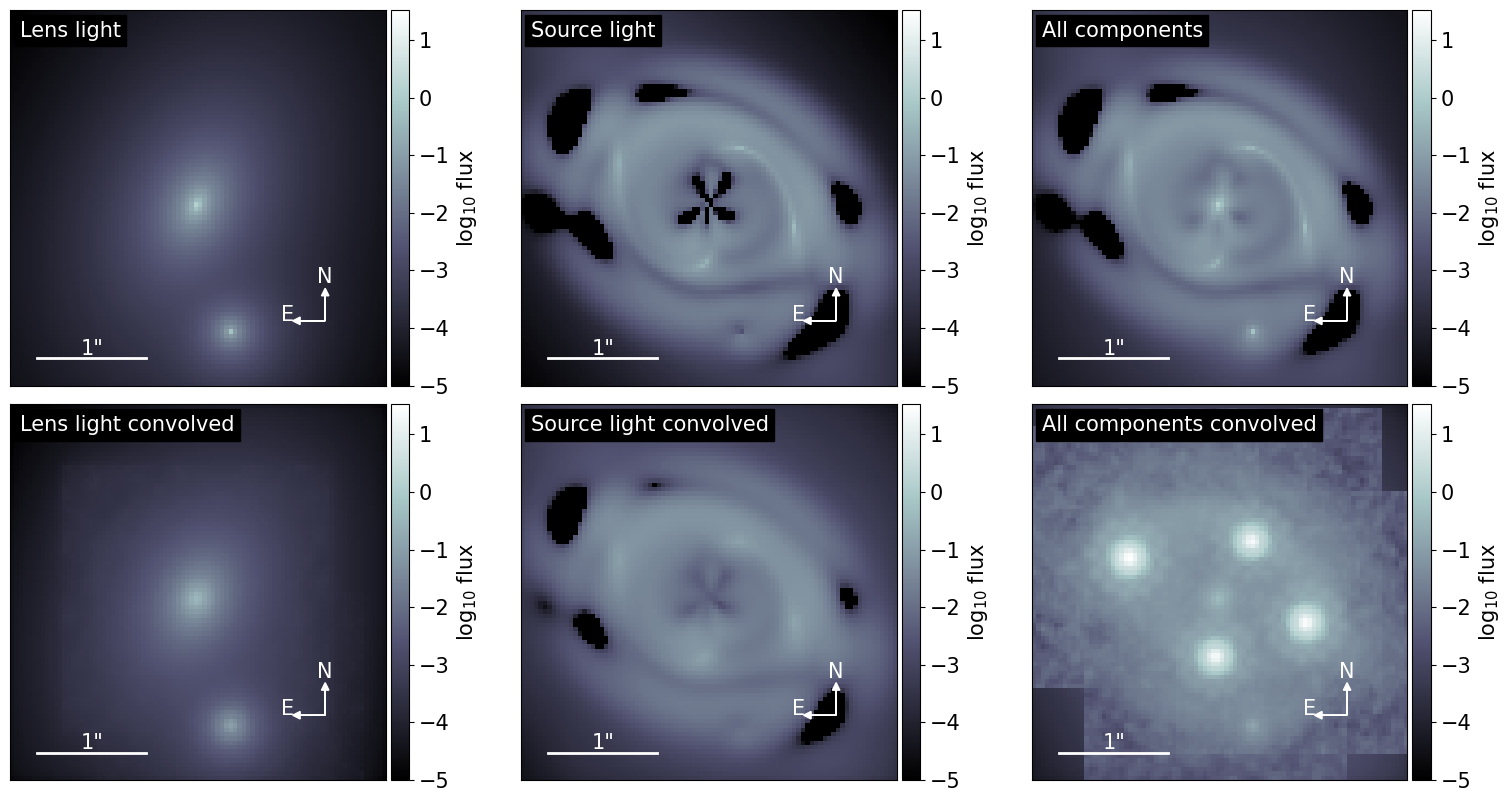

{'kwargs_lens': [{'theta_E': 0.6586250306207602, 'gamma': 1.8892817505379103, 'e1': -0.08502209432662922, 'e2': -0.02550361699476926, 'center_x': 0.028394266199653535, 'center_y': -0.06504419995889822, 'a1_a': 0.0, 'delta_phi_m1': 0.037566821536395484, 'a3_a': 0.0, 'delta_phi_m3': 0.4677447942621006, 'a4_a': 0.0, 'delta_phi_m4': -0.1283996963694785}, {'gamma1': 0.06232759662294584, 'gamma2': 0.11891085643266908, 'ra_0': 0.0, 'dec_0': 0.0}, {'theta_E': 0.11910812741581576, 'center_x': -0.27998188021345705, 'center_y': -1.2434454864747635}], 'kwargs_source': [{'amp': 1.9894981413612436, 'R_sersic': 0.32022062731925766, 'n_sersic': 3.7833261519331725, 'e1': -0.41622324321161414, 'e2': 0.3287856646210013, 'center_x': 0.04364067160583729, 'center_y': -0.14953911108998702}, {'amp': array([ 5.03165751e+01, -1.70647545e+01,  2.30288690e+01,  1.26450045e+01,
       -2.84091077e+00,  3.63488020e+00,  3.46942745e+00, -4.10911265e-01,
        5.95944815e+00, -3.19600769e+00, -3.88937705e+00,  2.58

/Users/danielgilman/Code/external/lenstronomy/lenstronomy/LensModel/MultiPlane/multi_plane.py:77: UserWarning: Cosmology is provided. Make sure your cosmological model is consistent with the cosmology_model argument.
  warnings.warn(


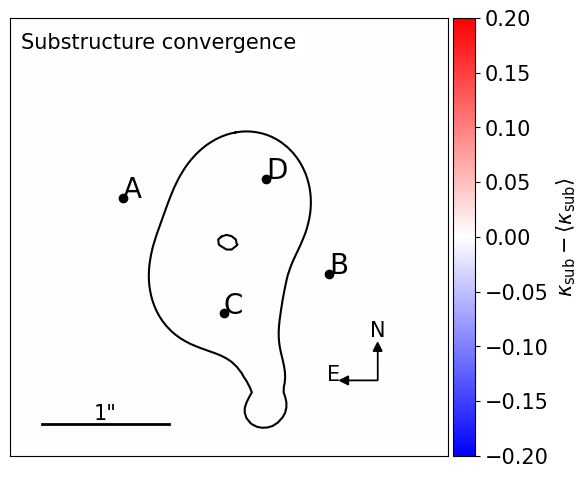

In [4]:
from lenstronomy.Plots.model_plot import ModelPlot
from lenstronomy.Plots import chain_plot
import matplotlib.pyplot as plt


multi_band_list = data.kwargs_data_joint['multi_band_list']
modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="bone",
                      image_likelihood_mask_list=[data.likelihood_mask],fast_caustic=True)

param_class = fitting_sequence.param_class
print(param_class.num_param())
#print(chain_list)

for i in range(len(chain_list)):
    chain_plot.plot_chain_list(chain_list, i)

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.data_plot(ax=axes[0,0], v_min=-2., v_max=0)
modelPlot.model_plot(ax=axes[0,1], v_min=-2., v_max=0)
modelPlot.normalized_residual_plot(ax=axes[0,2], v_min=-6, v_max=6)
modelPlot.source_plot(ax=axes[1, 0], deltaPix_source=0.01, numPix=100)
modelPlot.convergence_plot(ax=axes[1, 1], v_max=1)
modelPlot.magnification_plot(ax=axes[1, 2])
#f.tight_layout()
#f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
#plt.show()

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.decomposition_plot(ax=axes[0,0], text='Lens light', lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,0], text='Lens light convolved', lens_light_add=True)
modelPlot.decomposition_plot(ax=axes[0,1], text='Source light', source_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,1], text='Source light convolved', source_add=True)
modelPlot.decomposition_plot(ax=axes[0,2], text='All components', source_add=True, lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,2], text='All components convolved', source_add=True, lens_light_add=True, point_source_add=True)
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
plt.show()

fig = plt.figure()
fig.set_size_inches(6, 6)
ax = plt.subplot(111)
kwargs_plot = {'ax': ax,
               'index_macromodel': [0, 1,2], 
              'with_critical_curves': True,
              'v_min': -0.2,'v_max': 0.2}
modelPlot.substructure_plot(band_index=0, **kwargs_plot)
print(kwargs_result)
print(kwargs_result['kwargs_lens'])

from lenstronomy.LensModel.lens_model import LensModel
lens_model = LensModel(kwargs_model['lens_model_list'], 
                      lens_redshift_list=kwargs_model['lens_redshift_list'], 
                      multi_plane=kwargs_model['multi_plane'], 
                      z_source=kwargs_model['z_source'])

ximg, yimg = data.x_image, data.y_image
m = np.absolute(lens_model.magnification(ximg, yimg, kwargs_result['kwargs_lens']))
print('best fit flux ratios: ', m[1:]/m[0])
print('measured flux ratios: ', np.array([1.01, 0.59, 0.75]))

-1.2954459348757623 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.2954459348757872


/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:68: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:225: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:1121: RuntimeWarning: invalid value encountered in log10
  np.log10(model),


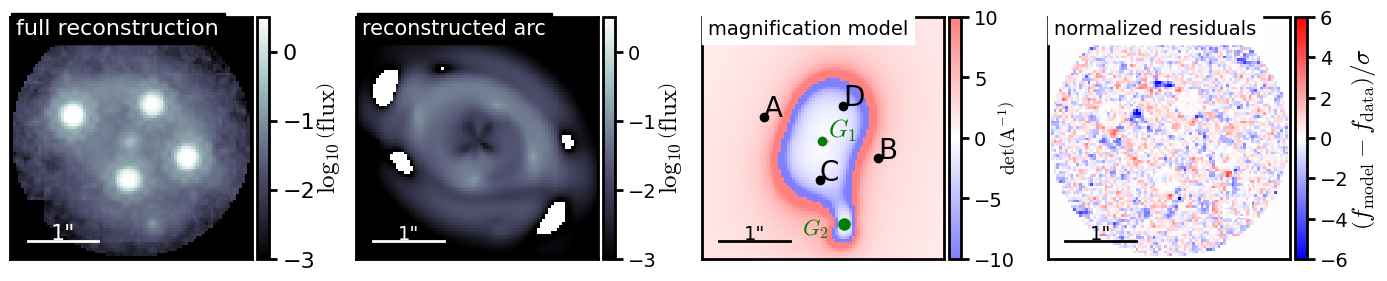

In [5]:
plt.rcParams['axes.linewidth'] = 2.
plt.rcParams['xtick.major.width'] = 2.
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.minor.width'] = 1.0
plt.rcParams['xtick.minor.size'] = 3.5
plt.rcParams['ytick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.minor.width'] = 1.0
plt.rcParams['ytick.minor.size'] = 3.5
plt.rcParams.update({'font.size': 16})
plt.rcParams['mathtext.fontset'] = 'cm'

modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="bone",
                      image_likelihood_mask_list=[data.likelihood_mask],fast_caustic=True)

fig = plt.figure(1)
fig.set_size_inches(14,4.5)

ax1 = plt.subplot(141)
modelPlot._arrow_size = 0
v_min = -3.
v_max = v_min + 3.5
modelPlot.model_plot(ax=ax1,
                    v_min=v_min,v_max=v_max,text='full reconstruction',font_size=16,no_arrow=True)
im = ax1.images
cb = im[-1].colorbar 
cb.set_label(r'$\log_{10}\left(\rm{flux}\right)$',labelpad=0,fontsize=18)


ax2 = plt.subplot(142)
modelPlot._arrow_size = 0
modelPlot.decomposition_plot(ax=ax2, text='reconstructed arc', unconvolved=False, 
                             source_add=True, v_min=v_min, v_max=v_max,cmap='bone',
                             font_size=14,no_arrow=True)
im = ax2.images
cb = im[-1].colorbar 
#cb.set_ticklabels(ticks,fontsize=16)
cb.set_label(r'$\log_{10}\left(\rm{flux}\right)$',labelpad=0,fontsize=18)

ax3 = plt.subplot(143)
modelPlot._arrow_size = 0
v_min = -3
v_max = v_min + 3.
modelPlot.magnification_plot(ax=ax3, cmap='bwr', text='magnification model', font_size=14,
                            no_arrow=True)
im = ax3.images
cb = im[-1].colorbar 
cb.set_label(r'$\rm{det}\left(A^{-1}\right)$',labelpad=-12)

satx = kwargs_result['kwargs_lens'][0]['center_x']
saty = kwargs_result['kwargs_lens'][0]['center_y']
xplot, yplot = data.coordinate_system.map_coord2pix(satx, saty)
pixel_width = data.coordinate_system.pixel_width
origin = [0,0]
x_ = xplot * pixel_width + origin[0]
y_ = yplot * pixel_width + origin[1]
ax3.plot(x_, y_, ".", color='g',markersize=12,alpha=1.)
ax3.text(x_+0.08, y_+0.05, r'$G_1$', fontsize=18, color='g')

satx = kwargs_result['kwargs_lens'][2]['center_x']
saty = kwargs_result['kwargs_lens'][2]['center_y']
xplot, yplot = data.coordinate_system.map_coord2pix(satx, saty)
pixel_width = data.coordinate_system.pixel_width
origin = [0,0]
x_ = xplot * pixel_width + origin[0]
y_ = yplot * pixel_width + origin[1]
ax3.plot(x_, y_, ".", color='g',markersize=16,alpha=1.)
ax3.text(x_-0.6, y_-0.15, r'$G_2$', fontsize=16, color='g')


ax4 = plt.subplot(144)
modelPlot._arrow_size = 0
v_min = -3
v_max = v_min + 3.
modelPlot.normalized_residual_plot(ax=ax4,
                    cmap='bwr',font_size=14, text='normalized residuals')
im = ax4.images
cb = im[-1].colorbar 
cb.set_label(r'$\left(f_{\rm{model}}-f_{\rm{data}}\right)/\sigma$',labelpad=0,fontsize=18)

plt.subplots_adjust(wspace=-0.43, hspace=0.1)
plt.tight_layout()

#plt.savefig('../bmodel_figures/1606bmodel.pdf',bbox_inches='tight')

median:  -439.8334030262499
standard dev:  103.33265945398193


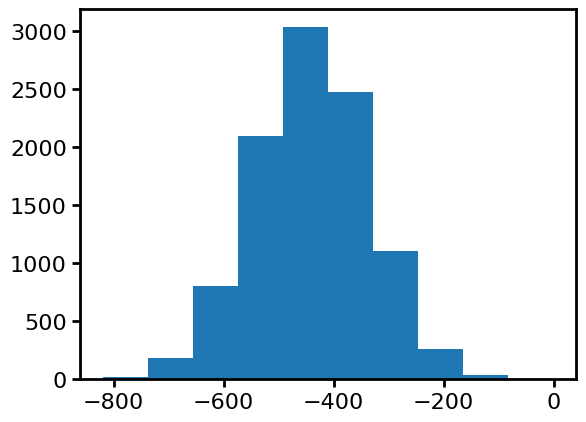

In [6]:
from lenstronomy.Util.class_creator import create_image_model 
import lenstronomy.Util.image_util as image_util

kwargs_data = data.kwargs_data
kwargs_psf = data.kwargs_psf
kwargs_numerics = data.kwargs_numerics 
image_model = create_image_model(kwargs_data, kwargs_psf, kwargs_numerics, kwargs_model)
likelihood_mask = data.likelihood_mask_imaging_weights
image_sim_no_noise = image_model.image(kwargs_result['kwargs_lens'], 
                              kwargs_result['kwargs_source'], 
                              kwargs_result['kwargs_lens_light'], 
                              kwargs_result['kwargs_ps'])
logL_list = []
model_error = image_model._error_map_model(
            kwargs_result['kwargs_lens'], kwargs_ps=kwargs_result['kwargs_ps'], kwargs_special=kwargs_result['kwargs_special']
        )
for i in range(0, 10000):
    poisson = image_util.add_poisson(image_sim_no_noise, exp_time=data.kwargs_data['exposure_time'])
    bkg = image_util.add_background(image_sim_no_noise, sigma_bkd=data.kwargs_data['background_rms'])
    noise_map = bkg + poisson
    image_sim = image_sim_no_noise + noise_map
    logL = image_model.Data.log_likelihood(image_sim_no_noise + noise_map, likelihood_mask, model_error)
    logL_list.append(logL)
    
max_logL = np.max(logL_list)
logL_list = np.array(logL_list) - max_logL
_ = plt.hist(logL_list)
print('median: ', np.median(logL_list))
print('standard dev: ', np.std(logL_list))